# Question 2 -1

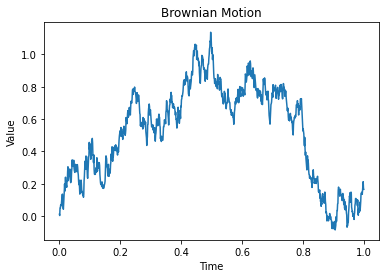

W1 = 0.0032591090114970907


In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of time steps
N = 1000

# Generate N+1 standard normal random variables
X = np.random.normal(size=N+1) # Consider this to be a random experiment whose distribution is of the a normal distribution with size 100

# Calculate the rescaled random walk
M = np.cumsum(X) # Producing a martingale, which basically is the cummilative sum of a the random experiment

W =M/np.sqrt(N) # Let N be the time steps, M be the martingale, then W is the random walk (scaled symmetric random walk)
# Plot the Brownian motion path
t = np.linspace(0, 1, N+1)
plt.plot(t, W)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Brownian Motion')
plt.show()

# Print the value of W1
print('W1 =', W[1])

In [91]:
def getrandomwalk(): 
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Set the number of time steps
    N = 1000

    # Generate N+1 standard normal random variables
    X = np.random.normal(size=N+1) # Consider this to be a random experiment whose distribution is of the a normal distribution with size 100

    # Calculate the rescaled random walk
    M = np.cumsum(X) # Producing a martingale, which basically is the cummilative sum of a the random experiment

    W =M/np.sqrt(N) # Let N be the time steps, M be the martingale, then W is the random walk (scaled symmetric random walk)
    # Plot the Brownian motion path
    t = np.linspace(0, 1, N+1)
    return W


# Question 2.1 - 1

In [92]:
def RiskfreeRate(K,theta,sigma):
    R = [0.01]
    for i in range(len(W)-1):
        R.append((R[i])+K*(theta - R[i])*(t[i+1]-t[i]) +(np.sqrt(R[i])*sigma*(W[i+1]-W[i])))
    return R

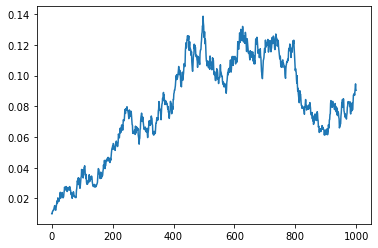

In [93]:
plt.plot(RiskfreeRate(0.1,1.2,0.3))

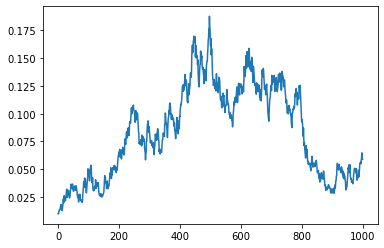

In [94]:
plt.plot(RiskfreeRate(0.1,1.2,0.5))

In [95]:
# As you can see above, it has only taken 600 iterations, once it reaches 600th iteration it has occuured a negative value and it stops

# Question 2.1 - 2

In [148]:
import math
def RiskExpectationFormula(K,theta,sigma,i):
    return  0.01*math.exp(-K*t[i])+theta*(1-math.exp(-K*t[i]))
def RiskExpectation(K,theta,sigma,l):
    Rt = []
    for j in range(1000):
        W = getrandomwalk()
        R = [0.01]
        for i in range(100):
            R.append((R[i])+K*(theta - R[i])*(t[i+1]-t[i]) +(np.sqrt(R[i])*sigma*(W[i+1]-W[i])))
        Rt.append(R[l])
    return np.mean(Rt)

In [152]:
RiskExpectationFormula(0.1,1.2,0.3,20)

0.012377621585873636

In [151]:
RiskExpectation(0.1,1.2,0.3,20)

0.01263857279043878

# Question 2.1 - 3

In [153]:
# Considering r0 as 0.01
import math
def RiskVarianceFormula(K,theta,sigma,i):
    return  0.01*(np.square(sigma)/K)*(math.exp(-K*t[i]) - math.exp(-2*K*t[i])) + theta*(np.square(sigma)/2*K)*np.square((1-math.exp(-K*t[i])))
def RiskVariance(K,theta,sigma,l):
    Rt = []
    for j in range(1000):
        W = getrandomwalk()
        R = [0.01]
        for i in range(100):
            R.append((R[i])+K*(theta - R[i])*(t[i+1]-t[i]) +(np.sqrt(R[i])*sigma*(W[i+1]-W[i])))
        Rt.append(R[l])
    return np.var(Rt)

In [156]:
RiskVarianceFormula(0.1,1.2,0.3,10)

8.991905097526137e-06

In [157]:
RiskVariance(0.1,1.2,0.3,10)

8.995288235594683e-06

In [203]:
def Final(K,T,t,r,theta,sigma):
    g = np.sqrt(K**2 + 2*(sigma**2))
    A = ((2*g*math.exp((K+g)*(T-t)/2))/((g+K)*(math.exp(g*(T-t)-1))+2*g))**(2*K*theta/(np.square(sigma)))
    B = ((2*(math.exp(g*(T-t))-1))/((g+K)*(math.exp(g*(T-t)-1))+2*g))
    return A*math.exp(-B*r)

In [204]:
Sigma = []
# Sigma
for i in np.linspace(0.1,0.45,10):
    Sigma.append(Final(0.1,1,0,0.01,1.2,i))

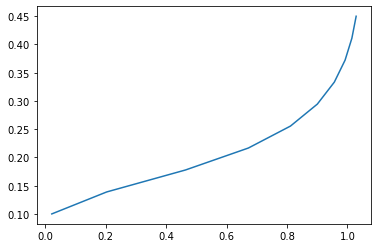

In [205]:
y = np.linspace(0.1,0.45,10)
plt.plot(Sigma,y)

In [206]:
K = []
# K
for i in np.linspace(0.1,1.5,30):
    K.append(Final(i,1,0,0.01,1.2,0.3))

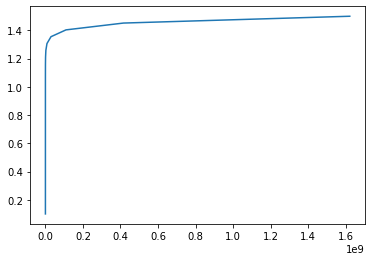

In [207]:
plt.plot(K,np.linspace(0.1,1.5,30))

In [208]:
theta = []
# theta
for i in np.linspace(0.1,1.5,30):
    theta.append(Final(0.1,1,0,0.01,i,0.3))

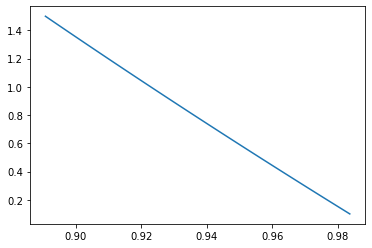

In [209]:
plt.plot(theta,np.linspace(0.1,1.5,30))